# CA

***Module Code: B8IT105***

***Module Title: B8IT105 Programming for Big Data***

***Student Name: Nicholas Godwin Udomboso***

***Student Number: 10547333***

This analysis focuses on the Premier League seasons from 2011/12 season through to the 2020/21 season. The data source is from https://www.skysports.com/premier-league-table website.

In [2]:
#The below imports the necessary libraries required to pull and analyse data from
#https://www.skysports.com/premier-league-table website.

import requests
import pandas as pd
import numpy as np
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot')


In [3]:
#The below imports the Beautiful Soup library to pull data from the website pages
from bs4 import BeautifulSoup

In [4]:
#The below are the web pages from which I sourced the data from.
#Each of the webpage urls is assigned to a variable as seen below.

url2020='https://www.skysports.com/premier-league-table/2020'
url2019='https://www.skysports.com/premier-league-table/2019'
url2018='https://www.skysports.com/premier-league-table/2018'
url2017='https://www.skysports.com/premier-league-table/2017'
url2016='https://www.skysports.com/premier-league-table/2016'
url2015='https://www.skysports.com/premier-league-table/2015'
url2014='https://www.skysports.com/premier-league-table/2014'
url2013='https://www.skysports.com/premier-league-table/2013'
url2012='https://www.skysports.com/premier-league-table/2012'
url2011='https://www.skysports.com/premier-league-table/2011'

In [5]:
#Using requests.get method, I am able to make requests to the listed urls
page2020=requests.get(url2020)
page2019=requests.get(url2019)
page2018=requests.get(url2018)
page2017=requests.get(url2017)
page2016=requests.get(url2016)
page2015=requests.get(url2015)
page2014=requests.get(url2014)
page2013=requests.get(url2013)
page2012=requests.get(url2012)
page2011=requests.get(url2011)

In [6]:
#Each of the urls responded successfully with a status code 200 as seen below.
print(page2020.status_code)
print(page2019.status_code)
print(page2018.status_code)
print(page2017.status_code)
print(page2016.status_code)
print(page2015.status_code)
print(page2014.status_code)
print(page2013.status_code)
print(page2012.status_code)
print(page2011.status_code)

200
200
200
200
200
200
200
200
200
200


In [8]:
#With the help of BeautifulSoup library, each of the webpages is parsed using html parser and stored in their
#respective declared beautiful soup objects as seen below.

soup2020 = BeautifulSoup(page2020.text, 'html.parser')
soup2019 = BeautifulSoup(page2019.text, 'html.parser')
soup2018 = BeautifulSoup(page2018.text, 'html.parser')
soup2017 = BeautifulSoup(page2017.text, 'html.parser')
soup2016 = BeautifulSoup(page2016.text, 'html.parser')
soup2015 = BeautifulSoup(page2015.text, 'html.parser')
soup2014 = BeautifulSoup(page2014.text, 'html.parser')
soup2013 = BeautifulSoup(page2013.text, 'html.parser')
soup2012 = BeautifulSoup(page2012.text, 'html.parser')
soup2011 = BeautifulSoup(page2011.text, 'html.parser')

In [9]:
#The below searches the html tags of each of the webpages for table tag, having label "standing-table__table".
#This helped in pulling the data of each season's premier league table from 2011/2012 season up to the
#ongoing 2020/21 season.The pulled data is assigned a corresponding variable to hold the data.

league2020 = soup2020.find('table', class_ = "standing-table__table")
league2019 = soup2019.find('table', class_ = "standing-table__table")
league2018 = soup2018.find('table', class_ = "standing-table__table")
league2017 = soup2017.find('table', class_ = "standing-table__table")
league2016 = soup2016.find('table', class_ = "standing-table__table")
league2015 = soup2015.find('table', class_ = "standing-table__table")
league2014 = soup2014.find('table', class_ = "standing-table__table")
league2013 = soup2013.find('table', class_ = "standing-table__table")
league2012 = soup2012.find('table', class_ = "standing-table__table")
league2011 = soup2011.find('table', class_ = "standing-table__table")

In [10]:
#The below does further search to locate 'tbody' tag and pulls the contents of the tag into the respective
#variable representing each season. 

#When I right-clicked on each of the web pages,the 'tbody' tag is the html tag holding the table data for
#each of the premier league season. 

league2020_table = league2020.find('tbody')
league2019_table = league2019.find('tbody')
league2018_table = league2018.find('tbody')
league2017_table = league2017.find('tbody')
league2016_table = league2016.find('tbody')
league2015_table = league2015.find('tbody')
league2014_table = league2014.find('tbody')
league2013_table = league2013.find('tbody')
league2012_table = league2012.find('tbody')
league2011_table = league2011.find('tbody')

In [11]:
#The below does further search to find the 'tr' tags. Each of the 'tr' tags represent the table row of each of the 
#rows in the premier league table.

#The table rows of each season's webpage is stored in a variable as seen below.

team2020_list = league2020_table.find_all('tr')
team2019_list = league2019_table.find_all('tr')
team2018_list = league2018_table.find_all('tr')
team2017_list = league2017_table.find_all('tr')
team2016_list = league2016_table.find_all('tr')
team2015_list = league2015_table.find_all('tr')
team2014_list = league2014_table.find_all('tr')
team2013_list = league2013_table.find_all('tr')
team2012_list = league2012_table.find_all('tr')
team2011_list = league2011_table.find_all('tr')

In [12]:
#print(team2011_list)

The below logic loops through the table records of each season, i.e. the 'td' tags to fetch the cell values of each column of the table. The loop is executed for each of the variable holding the table data for each season.

In [13]:
#2020/21 season
league_2020 = [] #list variable declared for 2020/21 season

for team in team2020_list: #looping through the tags to find 'td' tags to extract cell values for 2020/21 season
    team_position=team.find('td', class_="standing-table__cell").text.strip()
    team_names=team.find('td', class_="standing-table__cell standing-table__cell--name").text.strip()
    games_played=team.find_all('td', class_="standing-table__cell")[2].text.strip()
    games_won=team.find_all('td', class_="standing-table__cell")[3].text.strip()
    games_drawn=team.find_all('td', class_="standing-table__cell")[4].text.strip()
    games_lost=team.find_all('td', class_="standing-table__cell")[5].text.strip()
    goals_for=team.find_all('td', class_="standing-table__cell")[6].text.strip()
    goals_against=team.find_all('td', class_="standing-table__cell")[7].text.strip()
    goals_diffrence=team.find_all('td', class_="standing-table__cell")[8].text.strip()
    team_points=team.find_all('td', class_="standing-table__cell")[9].text.strip()

    
    league2020_dict = {'Position':team_position, 'Team':team_names, 'Played':games_played, 'Won':games_won,
                       'Drawn': games_drawn, 'Lost':games_lost, 'GoalFor':goals_for, 'GoalAgainst':goals_against,
                       'GoalDifference':goals_diffrence, 'Points':team_points} #populates the dictionary with the
    #extracted data from 'td' tags
    
    league_2020.append(league2020_dict) #appends the list with the dictionary data

In [14]:
#2019/20 season
league_2019 = []#list variable declared for 2019/20 season

for team in team2019_list: #looping through the tags to find 'td' tags to extract cell values for 2019/20 season
    team_position=team.find('td', class_="standing-table__cell").text.strip()
    team_names=team.find('td', class_="standing-table__cell standing-table__cell--name").text.strip()
    games_played=team.find_all('td', class_="standing-table__cell")[2].text.strip()
    games_won=team.find_all('td', class_="standing-table__cell")[3].text.strip()
    games_drawn=team.find_all('td', class_="standing-table__cell")[4].text.strip()
    games_lost=team.find_all('td', class_="standing-table__cell")[5].text.strip()
    goals_for=team.find_all('td', class_="standing-table__cell")[6].text.strip()
    goals_against=team.find_all('td', class_="standing-table__cell")[7].text.strip()
    goals_diffrence=team.find_all('td', class_="standing-table__cell")[8].text.strip()
    team_points=team.find_all('td', class_="standing-table__cell")[9].text.strip()

    
    league2019_dict = {'Position':team_position, 'Team':team_names, 'Played':games_played, 'Won':games_won,
                       'Drawn': games_drawn, 'Lost':games_lost, 'GoalFor':goals_for, 'GoalAgainst':goals_against,
                       'GoalDifference':goals_diffrence, 'Points':team_points} #populates the dictionary with the
    #extracted data from 'td' tags
    
    league_2019.append(league2019_dict) #appends the list with the dictionary data

In [15]:
#2018/19 season
league_2018 = [] #list variable declared for 2018/19 season

for team in team2018_list: #looping through the tags to find 'td' tags to extract cell values for 2018/19 season
    team_position=team.find('td', class_="standing-table__cell").text.strip()
    team_names=team.find('td', class_="standing-table__cell standing-table__cell--name").text.strip()
    games_played=team.find_all('td', class_="standing-table__cell")[2].text.strip()
    games_won=team.find_all('td', class_="standing-table__cell")[3].text.strip()
    games_drawn=team.find_all('td', class_="standing-table__cell")[4].text.strip()
    games_lost=team.find_all('td', class_="standing-table__cell")[5].text.strip()
    goals_for=team.find_all('td', class_="standing-table__cell")[6].text.strip()
    goals_against=team.find_all('td', class_="standing-table__cell")[7].text.strip()
    goals_diffrence=team.find_all('td', class_="standing-table__cell")[8].text.strip()
    team_points=team.find_all('td', class_="standing-table__cell")[9].text.strip()

    
    league2018_dict = {'Position':team_position, 'Team':team_names, 'Played':games_played, 'Won':games_won,
                       'Drawn': games_drawn, 'Lost':games_lost, 'GoalFor':goals_for, 'GoalAgainst':goals_against,
                       'GoalDifference':goals_diffrence, 'Points':team_points} #populates the dictionary with the
    #extracted data from 'td' tags
    
    league_2018.append(league2018_dict) #appends the list with the dictionary data

In [16]:
#2017/18 season
league_2017 = [] #list variable declared for 2017/18 season

for team in team2017_list: #looping through the tags to find 'td' tags to extract cell values for 2017/18 season
    team_position=team.find('td', class_="standing-table__cell").text.strip()
    team_names=team.find('td', class_="standing-table__cell standing-table__cell--name").text.strip()
    games_played=team.find_all('td', class_="standing-table__cell")[2].text.strip()
    games_won=team.find_all('td', class_="standing-table__cell")[3].text.strip()
    games_drawn=team.find_all('td', class_="standing-table__cell")[4].text.strip()
    games_lost=team.find_all('td', class_="standing-table__cell")[5].text.strip()
    goals_for=team.find_all('td', class_="standing-table__cell")[6].text.strip()
    goals_against=team.find_all('td', class_="standing-table__cell")[7].text.strip()
    goals_diffrence=team.find_all('td', class_="standing-table__cell")[8].text.strip()
    team_points=team.find_all('td', class_="standing-table__cell")[9].text.strip()

    
    league2017_dict = {'Position':team_position, 'Team':team_names, 'Played':games_played, 'Won':games_won,
                       'Drawn': games_drawn, 'Lost':games_lost, 'GoalFor':goals_for, 'GoalAgainst':goals_against,
                       'GoalDifference':goals_diffrence, 'Points':team_points} #populates the dictionary with the
    #extracted data from 'td' tags
    
    league_2017.append(league2017_dict) #appends the list with the dictionary data

In [17]:
#2016/17 season
league_2016 = [] #list variable declared for 2016/17 season

for team in team2016_list: #looping through the tags to find 'td' tags to extract cell values for 2016/17 season
    team_position=team.find('td', class_="standing-table__cell").text.strip()
    team_names=team.find('td', class_="standing-table__cell standing-table__cell--name").text.strip()
    games_played=team.find_all('td', class_="standing-table__cell")[2].text.strip()
    games_won=team.find_all('td', class_="standing-table__cell")[3].text.strip()
    games_drawn=team.find_all('td', class_="standing-table__cell")[4].text.strip()
    games_lost=team.find_all('td', class_="standing-table__cell")[5].text.strip()
    goals_for=team.find_all('td', class_="standing-table__cell")[6].text.strip()
    goals_against=team.find_all('td', class_="standing-table__cell")[7].text.strip()
    goals_diffrence=team.find_all('td', class_="standing-table__cell")[8].text.strip()
    team_points=team.find_all('td', class_="standing-table__cell")[9].text.strip()

    
    league2016_dict = {'Position':team_position, 'Team':team_names, 'Played':games_played, 'Won':games_won,
                       'Drawn': games_drawn, 'Lost':games_lost, 'GoalFor':goals_for, 'GoalAgainst':goals_against,
                       'GoalDifference':goals_diffrence, 'Points':team_points} #populates the dictionary with the
    #extracted data from 'td' tags
    
    league_2016.append(league2016_dict) #appends the list with the dictionary data

In [18]:
#2015/16 season
league_2015 = [] #list variable declared for 2015/16 season

for team in team2015_list: #looping through the tags to find 'td' tags to extract cell values for 2015/16 season
    team_position=team.find('td', class_="standing-table__cell").text.strip()
    team_names=team.find('td', class_="standing-table__cell standing-table__cell--name").text.strip()
    games_played=team.find_all('td', class_="standing-table__cell")[2].text.strip()
    games_won=team.find_all('td', class_="standing-table__cell")[3].text.strip()
    games_drawn=team.find_all('td', class_="standing-table__cell")[4].text.strip()
    games_lost=team.find_all('td', class_="standing-table__cell")[5].text.strip()
    goals_for=team.find_all('td', class_="standing-table__cell")[6].text.strip()
    goals_against=team.find_all('td', class_="standing-table__cell")[7].text.strip()
    goals_diffrence=team.find_all('td', class_="standing-table__cell")[8].text.strip()
    team_points=team.find_all('td', class_="standing-table__cell")[9].text.strip()

    
    league2015_dict = {'Position':team_position, 'Team':team_names, 'Played':games_played, 'Won':games_won,
                       'Drawn': games_drawn, 'Lost':games_lost, 'GoalFor':goals_for, 'GoalAgainst':goals_against,
                       'GoalDifference':goals_diffrence, 'Points':team_points} #populates the dictionary with the
    #extracted data from 'td' tags
    
    league_2015.append(league2015_dict) #appends the list with the dictionary data

In [19]:
#2014/15 season
league_2014 = [] #list variable declared for 2014/15 season

for team in team2014_list: #looping through the tags to find 'td' tags to extract cell values for 2014/15 season
    team_position=team.find('td', class_="standing-table__cell").text.strip()
    team_names=team.find('td', class_="standing-table__cell standing-table__cell--name").text.strip()
    games_played=team.find_all('td', class_="standing-table__cell")[2].text.strip()
    games_won=team.find_all('td', class_="standing-table__cell")[3].text.strip()
    games_drawn=team.find_all('td', class_="standing-table__cell")[4].text.strip()
    games_lost=team.find_all('td', class_="standing-table__cell")[5].text.strip()
    goals_for=team.find_all('td', class_="standing-table__cell")[6].text.strip()
    goals_against=team.find_all('td', class_="standing-table__cell")[7].text.strip()
    goals_diffrence=team.find_all('td', class_="standing-table__cell")[8].text.strip()
    team_points=team.find_all('td', class_="standing-table__cell")[9].text.strip()

    
    league2014_dict = {'Position':team_position, 'Team':team_names, 'Played':games_played, 'Won':games_won,
                       'Drawn': games_drawn, 'Lost':games_lost, 'GoalFor':goals_for, 'GoalAgainst':goals_against,
                       'GoalDifference':goals_diffrence, 'Points':team_points} #populates the dictionary with the
    #extracted data from 'td' tags
    
    league_2014.append(league2014_dict) #appends the list with the dictionary data

In [20]:
#2013/14 season
league_2013 = [] #list variable declared for 2013/14 season

for team in team2013_list: #looping through the tags to find 'td' tags to extract cell values for 2013/14 season
    team_position=team.find('td', class_="standing-table__cell").text.strip()
    team_names=team.find('td', class_="standing-table__cell standing-table__cell--name").text.strip()
    games_played=team.find_all('td', class_="standing-table__cell")[2].text.strip()
    games_won=team.find_all('td', class_="standing-table__cell")[3].text.strip()
    games_drawn=team.find_all('td', class_="standing-table__cell")[4].text.strip()
    games_lost=team.find_all('td', class_="standing-table__cell")[5].text.strip()
    goals_for=team.find_all('td', class_="standing-table__cell")[6].text.strip()
    goals_against=team.find_all('td', class_="standing-table__cell")[7].text.strip()
    goals_diffrence=team.find_all('td', class_="standing-table__cell")[8].text.strip()
    team_points=team.find_all('td', class_="standing-table__cell")[9].text.strip()

    
    league2013_dict = {'Position':team_position, 'Team':team_names, 'Played':games_played, 'Won':games_won,
                       'Drawn': games_drawn, 'Lost':games_lost, 'GoalFor':goals_for, 'GoalAgainst':goals_against,
                       'GoalDifference':goals_diffrence, 'Points':team_points} #populates the dictionary with the
    #extracted data from 'td' tags
    
    league_2013.append(league2013_dict) #appends the list with the dictionary data

In [21]:
#2012/13 season
league_2012= [] #list variable declared for 2012/13 season

for team in team2012_list: #looping through the tags to find 'td' tags to extract cell values for 2012/13 season
    team_position=team.find('td', class_="standing-table__cell").text.strip()
    team_names=team.find('td', class_="standing-table__cell standing-table__cell--name").text.strip()
    games_played=team.find_all('td', class_="standing-table__cell")[2].text.strip()
    games_won=team.find_all('td', class_="standing-table__cell")[3].text.strip()
    games_drawn=team.find_all('td', class_="standing-table__cell")[4].text.strip()
    games_lost=team.find_all('td', class_="standing-table__cell")[5].text.strip()
    goals_for=team.find_all('td', class_="standing-table__cell")[6].text.strip()
    goals_against=team.find_all('td', class_="standing-table__cell")[7].text.strip()
    goals_diffrence=team.find_all('td', class_="standing-table__cell")[8].text.strip()
    team_points=team.find_all('td', class_="standing-table__cell")[9].text.strip()

    
    league2012_dict = {'Position':team_position, 'Team':team_names, 'Played':games_played, 'Won':games_won,
                       'Drawn': games_drawn, 'Lost':games_lost, 'GoalFor':goals_for, 'GoalAgainst':goals_against,
                       'GoalDifference':goals_diffrence, 'Points':team_points} #populates the dictionary with the
    #extracted data from 'td' tags
    
    league_2012.append(league2012_dict) #appends the list with the dictionary data

In [22]:
#2011/12 season
league_2011= [] #list variable declared for 2011/12 season

for team in team2011_list: #looping through the tags to find 'td' tags to extract cell values for 2011/12 season
    team_position=team.find('td', class_="standing-table__cell").text.strip()
    team_names=team.find('td', class_="standing-table__cell standing-table__cell--name").text.strip()
    games_played=team.find_all('td', class_="standing-table__cell")[2].text.strip()
    games_won=team.find_all('td', class_="standing-table__cell")[3].text.strip()
    games_drawn=team.find_all('td', class_="standing-table__cell")[4].text.strip()
    games_lost=team.find_all('td', class_="standing-table__cell")[5].text.strip()
    goals_for=team.find_all('td', class_="standing-table__cell")[6].text.strip()
    goals_against=team.find_all('td', class_="standing-table__cell")[7].text.strip()
    goals_diffrence=team.find_all('td', class_="standing-table__cell")[8].text.strip()
    team_points=team.find_all('td', class_="standing-table__cell")[9].text.strip()

    
    league2011_dict = {'Position':team_position, 'Team':team_names, 'Played':games_played, 'Won':games_won,
                       'Drawn': games_drawn, 'Lost':games_lost, 'GoalFor':goals_for, 'GoalAgainst':goals_against,
                       'GoalDifference':goals_diffrence, 'Points':team_points} #populates the dictionary with the
    #extracted data from 'td' tags
    
    league_2011.append(league2011_dict) #appends the list with the dictionary data

In [23]:
#The below converts the data in each of the lists into dataframe.
#Each list holding each season's data is assigned a dataframe as seen below.

df2020=pd.json_normalize(league_2020)
df2019=pd.json_normalize(league_2019)
df2018=pd.json_normalize(league_2018)
df2017=pd.json_normalize(league_2017)
df2016=pd.json_normalize(league_2016)
df2015=pd.json_normalize(league_2015)
df2014=pd.json_normalize(league_2014)
df2013=pd.json_normalize(league_2013)
df2012=pd.json_normalize(league_2012)
df2011=pd.json_normalize(league_2011)

In [24]:
#df2020

**To display the data per each Premier League Season** 

In [25]:
#The purpose of the below codes is to split the df2020 data frame, converts the coulmns with numeric contents
#into 'int' datatype and then merge back the dataframe into one to display the data

df2020_position =df2020['Position']
df2020_team =df2020['Team']
df2020_stats = df2020[['Played','Won','Drawn','Lost',
                         'GoalFor','GoalAgainst','GoalDifference','Points']]
df2020_position =df2020['Position'].astype('int32')
df2020_stats=df2020_stats.astype('int32')
df2020=pd.concat([df2020_position,df2020_team,df2020_stats], axis=1) #merging the three splitted dataframes back to one

df2020 #displays the ongoing 2020/21 premier league table

,Position,Team,Played,Won,Drawn,Lost,GoalFor,GoalAgainst,GoalDifference,Points
0,1,Manchester City,22,15,5,2,43,14,29,50
1,2,Manchester United,23,13,6,4,49,30,19,45
2,3,Leicester City,23,13,4,6,39,25,14,43
3,4,Liverpool,23,11,7,5,44,29,15,40
4,5,Chelsea,23,11,6,6,38,24,14,39
5,6,West Ham United,23,11,6,6,34,28,6,39
6,7,Everton,21,11,4,6,34,28,6,37
7,8,Tottenham Hotspur,22,10,6,6,36,22,14,36
8,9,Aston Villa,21,11,2,8,36,24,12,35
9,10,Leeds United,22,10,2,10,38,38,0,32


In [26]:
#The purpose of the below codes is to split the df2019 data frame, converts the coulmns with numeric contents
#into 'int' datatype and then merge back the dataframe into one to display the data

df2019_position =df2019['Position']
df2019_team =df2019['Team']
df2019_stats = df2019[['Played','Won','Drawn','Lost',
                         'GoalFor','GoalAgainst','GoalDifference','Points']]
df2019_position =df2019['Position'].astype('int32')
df2019_stats=df2019_stats.astype('int32')
df2019=pd.concat([df2019_position,df2019_team,df2019_stats], axis=1) #merging the three splitted dataframes back to one

df2019 #displays the 2019/20 premier league table

,Position,Team,Played,Won,Drawn,Lost,GoalFor,GoalAgainst,GoalDifference,Points
0,1,Liverpool,38,32,3,3,85,33,52,99
1,2,Manchester City,38,26,3,9,102,35,67,81
2,3,Manchester United,38,18,12,8,66,36,30,66
3,4,Chelsea,38,20,6,12,69,54,15,66
4,5,Leicester City,38,18,8,12,67,41,26,62
5,6,Tottenham Hotspur,38,16,11,11,61,47,14,59
6,7,Wolverhampton Wanderers,38,15,14,9,51,40,11,59
7,8,Arsenal,38,14,14,10,56,48,8,56
8,9,Sheffield United,38,14,12,12,39,39,0,54
9,10,Burnley,38,15,9,14,43,50,-7,54


In [27]:
#The purpose of the below codes is to split the df2018 data frame, converts the coulmns with numeric contents
#into 'int' datatype and then merge back the dataframe into one to display the data

df2018_position =df2018['Position']
df2018_team =df2018['Team']
df2018_stats = df2018[['Played','Won','Drawn','Lost',
                         'GoalFor','GoalAgainst','GoalDifference','Points']]
df2018_position =df2018['Position'].astype('int32')
df2018_stats=df2018_stats.astype('int32')
df2018=pd.concat([df2018_position,df2018_team,df2018_stats], axis=1) #merging the three splitted dataframes back to one

df2018 #displays the 2018/19 premier league table

,Position,Team,Played,Won,Drawn,Lost,GoalFor,GoalAgainst,GoalDifference,Points
0,1,Manchester City,38,32,2,4,95,23,72,98
1,2,Liverpool,38,30,7,1,89,22,67,97
2,3,Chelsea,38,21,9,8,63,39,24,72
3,4,Tottenham Hotspur,38,23,2,13,67,39,28,71
4,5,Arsenal,38,21,7,10,73,51,22,70
5,6,Manchester United,38,19,9,10,65,54,11,66
6,7,Wolverhampton Wanderers,38,16,9,13,47,46,1,57
7,8,Everton,38,15,9,14,54,46,8,54
8,9,Leicester City,38,15,7,16,51,48,3,52
9,10,West Ham United,38,15,7,16,52,55,-3,52


In [28]:
#The purpose of the below codes is to split the df2017 data frame, converts the coulmns with numeric contents
#into 'int' datatype and then merge back the dataframe into one to display the data

df2017_position =df2017['Position']
df2017_team =df2017['Team']
df2017_stats = df2017[['Played','Won','Drawn','Lost',
                         'GoalFor','GoalAgainst','GoalDifference','Points']]
df2017_position =df2017['Position'].astype('int32')
df2017_stats=df2017_stats.astype('int32')
df2017=pd.concat([df2017_position,df2017_team,df2017_stats], axis=1) #merging the three splitted dataframes back to one

df2017 #displays the 2017/18 premier league table

,Position,Team,Played,Won,Drawn,Lost,GoalFor,GoalAgainst,GoalDifference,Points
0,1,Manchester City,38,32,4,2,106,27,79,100
1,2,Manchester United,38,25,6,7,68,28,40,81
2,3,Tottenham Hotspur,38,23,8,7,74,36,38,77
3,4,Liverpool,38,21,12,5,84,38,46,75
4,5,Chelsea,38,21,7,10,62,38,24,70
5,6,Arsenal,38,19,6,13,74,51,23,63
6,7,Burnley,38,14,12,12,36,39,-3,54
7,8,Everton,38,13,10,15,44,58,-14,49
8,9,Leicester City,38,12,11,15,56,60,-4,47
9,10,Newcastle United,38,12,8,18,39,47,-8,44


In [29]:
#The purpose of the below codes is to split the df2016 data frame, converts the coulmns with numeric contents
#into 'int' datatype and then merge back the dataframe into one to display the data

df2016_position =df2016['Position']
df2016_team =df2016['Team']
df2016_stats = df2016[['Played','Won','Drawn','Lost',
                         'GoalFor','GoalAgainst','GoalDifference','Points']]
df2016_position =df2016['Position'].astype('int32')
df2016_stats=df2016_stats.astype('int32')
df2016=pd.concat([df2016_position,df2016_team,df2016_stats], axis=1) #merging the three splitted dataframes back to one

df2016 #displays the 2016/17 premier league table

,Position,Team,Played,Won,Drawn,Lost,GoalFor,GoalAgainst,GoalDifference,Points
0,1,Chelsea,38,30,3,5,85,33,52,93
1,2,Tottenham Hotspur,38,26,8,4,86,26,60,86
2,3,Manchester City,38,23,9,6,80,39,41,78
3,4,Liverpool,38,22,10,6,78,42,36,76
4,5,Arsenal,38,23,6,9,77,44,33,75
5,6,Manchester United,38,18,15,5,54,29,25,69
6,7,Everton,38,17,10,11,62,44,18,61
7,8,Southampton,38,12,10,16,41,48,-7,46
8,9,Bournemouth,38,12,10,16,55,67,-12,46
9,10,West Bromwich Albion,38,12,9,17,43,51,-8,45


In [30]:
#The purpose of the below codes is to split the df2015 data frame, converts the coulmns with numeric contents
#into 'int' datatype and then merge back the dataframe into one to display the data

df2015_position =df2015['Position']
df2015_team =df2015['Team']
df2015_stats = df2015[['Played','Won','Drawn','Lost',
                         'GoalFor','GoalAgainst','GoalDifference','Points']]
df2015_position =df2015['Position'].astype('int32')
df2015_stats=df2015_stats.astype('int32')
df2015=pd.concat([df2015_position,df2015_team,df2015_stats], axis=1) #merging the three splitted dataframes back to one

df2015 #displays the 2015/16 premier league table

,Position,Team,Played,Won,Drawn,Lost,GoalFor,GoalAgainst,GoalDifference,Points
0,1,Leicester City,38,23,12,3,68,36,32,81
1,2,Arsenal,38,20,11,7,65,36,29,71
2,3,Tottenham Hotspur,38,19,13,6,69,35,34,70
3,4,Manchester City,38,19,9,10,71,41,30,66
4,5,Manchester United,38,19,9,10,49,35,14,66
5,6,Southampton,38,18,9,11,59,41,18,63
6,7,West Ham United,38,16,14,8,65,51,14,62
7,8,Liverpool,38,16,12,10,63,50,13,60
8,9,Stoke City,38,14,9,15,41,55,-14,51
9,10,Chelsea,38,12,14,12,59,53,6,50


In [31]:
#The purpose of the below codes is to split the df2014 data frame, converts the coulmns with numeric contents
#into 'int' datatype and then merge back the dataframe into one to display the data

df2014_position =df2014['Position']
df2014_team =df2014['Team']
df2014_stats = df2014[['Played','Won','Drawn','Lost',
                         'GoalFor','GoalAgainst','GoalDifference','Points']]
df2014_position =df2014['Position'].astype('int32')
df2014_stats=df2014_stats.astype('int32')
df2014=pd.concat([df2014_position,df2014_team,df2014_stats], axis=1) #merging the three splitted dataframes back to one

df2014 #displays the 2014/15 premier league table

,Position,Team,Played,Won,Drawn,Lost,GoalFor,GoalAgainst,GoalDifference,Points
0,1,Chelsea,38,26,9,3,73,32,41,87
1,2,Manchester City,38,24,7,7,83,38,45,79
2,3,Arsenal,38,22,9,7,71,36,35,75
3,4,Manchester United,38,20,10,8,62,37,25,70
4,5,Tottenham Hotspur,38,19,7,12,58,53,5,64
5,6,Liverpool,38,18,8,12,52,48,4,62
6,7,Southampton,38,18,6,14,54,33,21,60
7,8,Swansea City,38,16,8,14,46,49,-3,56
8,9,Stoke City,38,15,9,14,48,45,3,54
9,10,Crystal Palace,38,13,9,16,47,51,-4,48


In [32]:
#The purpose of the below codes is to split the df2013 data frame, converts the coulmns with numeric contents
#into 'int' datatype and then merge back the dataframe into one to display the data

df2013_position =df2013['Position']
df2013_team =df2013['Team']
df2013_stats = df2013[['Played','Won','Drawn','Lost',
                         'GoalFor','GoalAgainst','GoalDifference','Points']]
df2013_position =df2013['Position'].astype('int32')
df2013_stats=df2013_stats.astype('int32')
df2013=pd.concat([df2013_position,df2013_team,df2013_stats], axis=1) #merging the three splitted dataframes back to one

df2013 #displays the 2013/14 premier league table

,Position,Team,Played,Won,Drawn,Lost,GoalFor,GoalAgainst,GoalDifference,Points
0,1,Manchester City,38,27,5,6,102,37,65,86
1,2,Liverpool,38,26,6,6,101,50,51,84
2,3,Chelsea,38,25,7,6,71,27,44,82
3,4,Arsenal,38,24,7,7,68,41,27,79
4,5,Everton,38,21,9,8,61,39,22,72
5,6,Tottenham Hotspur,38,21,6,11,55,51,4,69
6,7,Manchester United,38,19,7,12,64,43,21,64
7,8,Southampton,38,15,11,12,54,46,8,56
8,9,Stoke City,38,13,11,14,45,52,-7,50
9,10,Newcastle United,38,15,4,19,43,59,-16,49


In [48]:
#The purpose of the below codes is to split the df2012 data frame, converts the coulmns with numeric contents
#into int datatype and then merge back the dataframe into one to display the data

df2012_position =df2012['Position']
df2012_team =df2012['Team']
df2012_stats = df2012[['Played','Won','Drawn','Lost',
                         'GoalFor','GoalAgainst','GoalDifference','Points']]
df2012_position =df2012['Position'].astype('int32')
df2012_stats=df2012_stats.astype('int32')
df2012=pd.concat([df2012_position,df2012_team,df2012_stats], axis=1) #merging the three splitted dataframes back to one

df2012 #displays the 2012/13 premier league table

,Position,Team,Played,Won,Drawn,Lost,GoalFor,GoalAgainst,GoalDifference,Points
0,1,Manchester United,38,28,5,5,86,43,43,89
1,2,Manchester City,38,23,9,6,66,34,32,78
2,3,Chelsea,38,22,9,7,75,39,36,75
3,4,Arsenal,38,21,10,7,72,37,35,73
4,5,Tottenham Hotspur,38,21,9,8,66,46,20,72
5,6,Everton,38,16,15,7,55,40,15,63
6,7,Liverpool,38,16,13,9,71,43,28,61
7,8,West Bromwich Albion,38,14,7,17,53,57,-4,49
8,9,Swansea City,38,11,13,14,47,51,-4,46
9,10,West Ham United,38,12,10,16,45,53,-8,46


In [33]:
#The purpose of the below codes is to split the df2011 data frame, converts the coulmns with numeric contents
#into 'int' datatype and then merge back the dataframe into one to display the data

df2011_position =df2011['Position']
df2011_team =df2011['Team']
df2011_stats = df2011[['Played','Won','Drawn','Lost',
                         'GoalFor','GoalAgainst','GoalDifference','Points']]
df2011_position =df2011['Position'].astype('int32')
df2011_stats=df2011_stats.astype('int32')
df2011=pd.concat([df2011_position,df2011_team,df2011_stats], axis=1) #merging the three splitted dataframes back to one

df2011 #displays the 2011/12 premier league table

,Position,Team,Played,Won,Drawn,Lost,GoalFor,GoalAgainst,GoalDifference,Points
0,1,Manchester City,38,28,5,5,93,29,64,89
1,2,Manchester United,38,28,5,5,89,33,56,89
2,3,Arsenal,38,21,7,10,74,49,25,70
3,4,Tottenham Hotspur,38,20,9,9,66,41,25,69
4,5,Newcastle United,38,19,8,11,56,51,5,65
5,6,Chelsea,38,18,10,10,65,46,19,64
6,7,Everton,38,15,11,12,50,40,10,56
7,8,Liverpool,38,14,10,14,47,40,7,52
8,9,Fulham,38,14,10,14,48,51,-3,52
9,10,West Bromwich Albion,38,13,8,17,45,52,-7,47


**To Visualize the Premier League data**

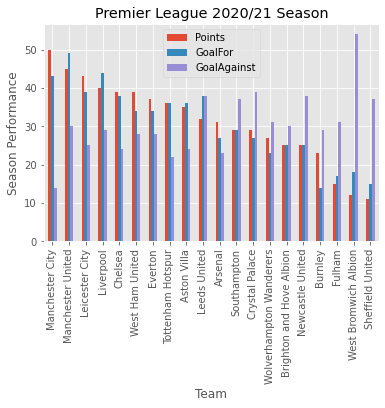

In [34]:
df2020.plot(x = 'Team', y = ['Points', 'GoalFor', 'GoalAgainst'], kind = 'bar')

plt.title('Premier League 2020/21 Season')
plt.ylabel('Season Performance')
plt.xlabel('Team')

plt.show()

The above chart shows that Manchester City is currently leading the ongoing 2020/21 Premier league season. Following the number of games played so far, the chart shows that Manchester City is the best defensively in the season as they have conceded less amount of goals.

Though Manchester United have scored more goals than the other teams in the season, they may likely not win the league because they are weaker defensively than any of the top four teams in the season.

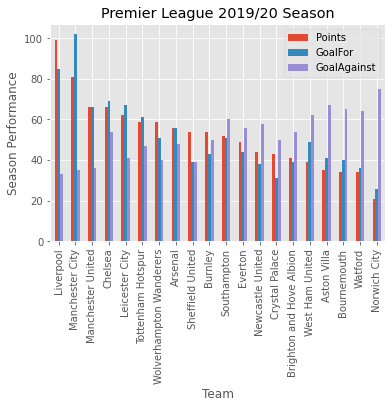

In [35]:
df2019.plot(x = 'Team', y = ['Points', 'GoalFor', 'GoalAgainst'], kind = 'bar')

plt.title('Premier League 2019/20 Season')
plt.ylabel('Season Performance')
plt.xlabel('Team')

plt.show()

The 2019/20 season chart above shows that Liverpool won the season's competition following their accumulation of the highest number of game points. However, Manchester City scored the highest number of goals in the season.

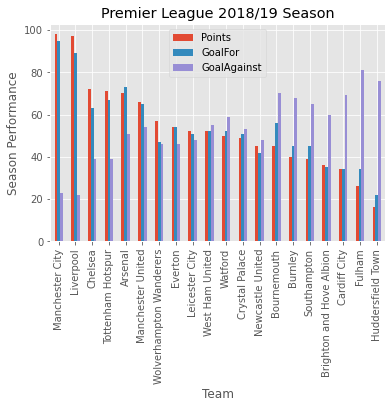

In [36]:
df2018.plot(x = 'Team', y = ['Points', 'GoalFor', 'GoalAgainst'], kind = 'bar')

plt.title('Premier League 2018/19 Season')
plt.ylabel('Season Performance')
plt.xlabel('Team')

plt.show()

The above chart shows that Manchester City slightly edged Liverpool in the 2018/19 season to win the league.

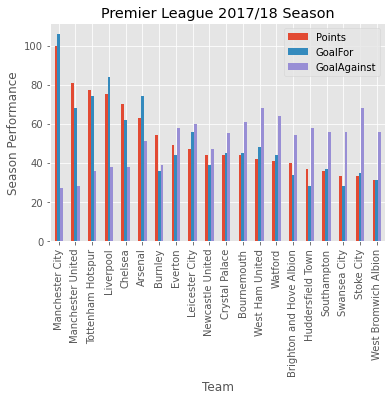

In [37]:
df2017.plot(x = 'Team', y = ['Points', 'GoalFor', 'GoalAgainst'], kind = 'bar')

plt.title('Premier League 2017/18 Season')
plt.ylabel('Season Performance')
plt.xlabel('Team')

plt.show()

The above chart shows that Manchester City were worlds apart in the 2017/18 season. They dominated performance in all areas of the game - points earned, goals scored and defensively. Manchester United who were second following their earning the next highest game points in the season did not even come close to Manchester City's performance. They was a wide gap in performance between Manchester City and the other teams.

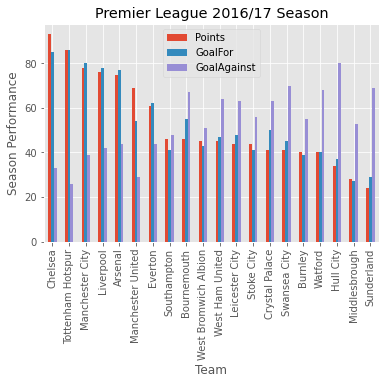

In [38]:
df2016.plot(x = 'Team', y = ['Points', 'GoalFor', 'GoalAgainst'], kind = 'bar')

plt.title('Premier League 2016/17 Season')
plt.ylabel('Season Performance')
plt.xlabel('Team')

plt.show()

Chelsea won the Premier League 2016/17 season with the higest points as shown in the above chart.

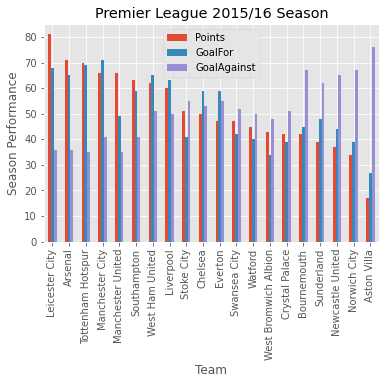

In [39]:
df2015.plot(x = 'Team', y = ['Points', 'GoalFor', 'GoalAgainst'], kind = 'bar')

plt.title('Premier League 2015/16 Season')
plt.ylabel('Season Performance')
plt.xlabel('Team')

plt.show()

Leicester City won the 2015/16 edition of the competition with the highest number of points as shown above.

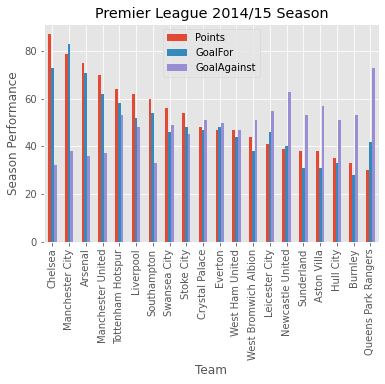

In [45]:
df2014.plot(x = 'Team', y = ['Points', 'GoalFor', 'GoalAgainst'], kind = 'bar')

plt.title('Premier League 2014/15 Season')
plt.ylabel('Season Performance')
plt.xlabel('Team')

plt.show()

The above chart shows Chelsea had the highest points and won the 2014/15 season. However Manchester City scored the most goals in the season.

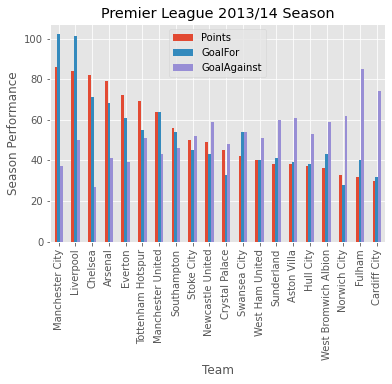

In [46]:
df2013.plot(x = 'Team', y = ['Points', 'GoalFor', 'GoalAgainst'], kind = 'bar')

plt.title('Premier League 2013/14 Season')
plt.ylabel('Season Performance')
plt.xlabel('Team')

plt.show()

The Premier League 2013/14 season was keenly contested by Manchester City and Liverpool as their game points and goals scored were very close. Manchester City finally won as shown in the above chart.

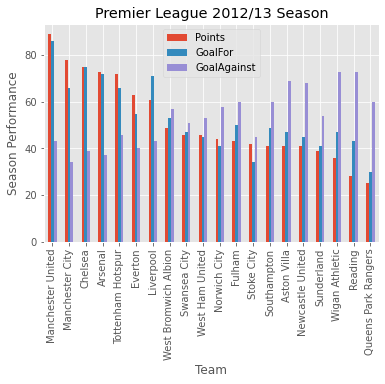

In [50]:
df2012.plot(x = 'Team', y = ['Points', 'GoalFor', 'GoalAgainst'], kind = 'bar')

plt.title('Premier League 2012/13 Season')
plt.ylabel('Season Performance')
plt.xlabel('Team')

plt.show()

The above chart shows that Manchester United won 2012/13 season with the most points and goals.

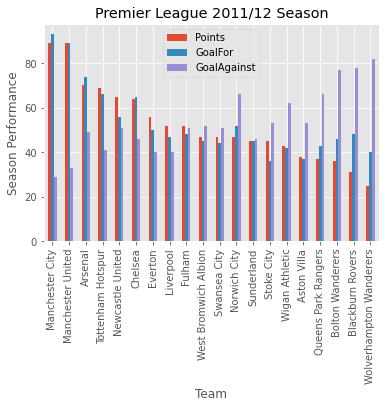

In [51]:
df2011.plot(x = 'Team', y = ['Points', 'GoalFor', 'GoalAgainst'], kind = 'bar')

plt.title('Premier League 2011/12 Season')
plt.ylabel('Season Performance')
plt.xlabel('Team')

plt.show()

Manchester City and Manchester United finished the 2011/12 premier league season with the same points. However as shown in the above chart, Manchester City won the competition on scoring higher number of goals.

**Comparing Seasons Performance**

In [52]:

#The below codes is used to calculate the total points and the total goals per season
#The output is stored in a dictonary for each season calculated
df2020_TotalStats = {'Season':"2020", 'Points':df2020['Points'].sum(), 'GoalFor':df2020['GoalFor'].sum()}
df2019_TotalStats = {'Season':"2019", 'Points':df2019['Points'].sum(), 'GoalFor':df2019['GoalFor'].sum()}
df2018_TotalStats = {'Season':"2018", 'Points':df2018['Points'].sum(), 'GoalFor':df2018['GoalFor'].sum()}
df2017_TotalStats = {'Season':"2017", 'Points':df2017['Points'].sum(), 'GoalFor':df2017['GoalFor'].sum()}
df2016_TotalStats = {'Season':"2016", 'Points':df2016['Points'].sum(), 'GoalFor':df2016['GoalFor'].sum()}
df2015_TotalStats = {'Season':"2015", 'Points':df2015['Points'].sum(), 'GoalFor':df2015['GoalFor'].sum()}
df2014_TotalStats = {'Season':"2014", 'Points':df2014['Points'].sum(), 'GoalFor':df2014['GoalFor'].sum()}
df2013_TotalStats = {'Season':"2013", 'Points':df2013['Points'].sum(), 'GoalFor':df2013['GoalFor'].sum()}
df2012_TotalStats = {'Season':"2012", 'Points':df2012['Points'].sum(), 'GoalFor':df2012['GoalFor'].sum()}
df2011_TotalStats = {'Season':"2011", 'Points':df2011['Points'].sum(), 'GoalFor':df2011['GoalFor'].sum()}

In [53]:
#The below converts the dictionary objects above to a corresponding dataframe
df2020_TotalStats=pd.json_normalize(df2020_TotalStats)
df2019_TotalStats=pd.json_normalize(df2019_TotalStats)
df2018_TotalStats=pd.json_normalize(df2018_TotalStats)
df2017_TotalStats=pd.json_normalize(df2017_TotalStats)
df2016_TotalStats=pd.json_normalize(df2016_TotalStats)
df2015_TotalStats=pd.json_normalize(df2015_TotalStats)
df2014_TotalStats=pd.json_normalize(df2014_TotalStats)
df2013_TotalStats=pd.json_normalize(df2013_TotalStats)
df2012_TotalStats=pd.json_normalize(df2012_TotalStats)
df2011_TotalStats=pd.json_normalize(df2011_TotalStats)

In [54]:
#The below merges the dataframes into one dataframe
df_TotalStats=pd.concat([df2019_TotalStats,df2018_TotalStats,df2017_TotalStats,
                        df2016_TotalStats, df2015_TotalStats, df2014_TotalStats, df2013_TotalStats,
                        df2012_TotalStats, df2011_TotalStats], axis=0)

In [55]:
df_TotalStats

,Season,Points,GoalFor
0,2019,1048,1034
0,2018,1069,1072
0,2017,1041,1018
0,2016,1056,1064
0,2015,1033,1026
0,2014,1047,975
0,2013,1062,1052
0,2012,1032,1063
0,2011,1047,1066


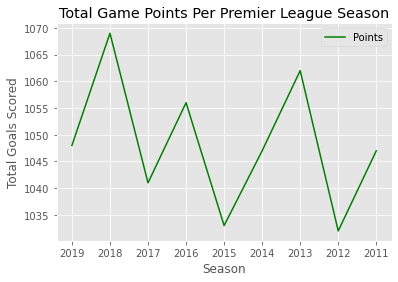

In [56]:
df_TotalStats.plot(x = 'Season', y = ['Points'], color= 'green', kind = 'line')

plt.title('Total Game Points Per Premier League Season')
plt.ylabel('Total Goals Scored')
plt.xlabel('Season')

plt.show()

Between 2011 and 2019, the league had its highest game points in 2018/19 season, and its lowest game points in 2012/13 season.

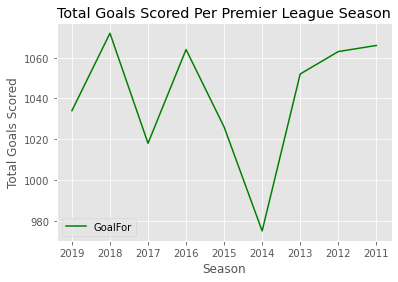

In [57]:
df_TotalStats.plot(x = 'Season', y = ['GoalFor'], color= 'green', kind = 'line')

plt.title('Total Goals Scored Per Premier League Season')
plt.ylabel('Total Goals Scored')
plt.xlabel('Season')

plt.show()

Between 2011 and 2019, the league had its highest goals scored in 2018/19 season, and its lowest goals scored in 2014/15 season.

In [58]:


#selecting rows with 'Position' == 1, representing the winning team per season
df2019_Winner = df2019.loc[df2019['Position'] == 1]
df2018_Winner = df2018.loc[df2018['Position'] == 1]
df2017_Winner = df2017.loc[df2017['Position'] == 1]
df2016_Winner = df2016.loc[df2016['Position'] == 1]
df2015_Winner = df2015.loc[df2015['Position'] == 1]
df2014_Winner = df2014.loc[df2014['Position'] == 1]
df2013_Winner = df2013.loc[df2013['Position'] == 1]
df2012_Winner = df2012.loc[df2012['Position'] == 1]
df2011_Winner = df2011.loc[df2011['Position'] == 1]



# Using DataFrame.insert() to add "Season" column 
df2019_Winner.insert(0, "Season", '2019/20', True) 
df2018_Winner.insert(0, "Season", '2018/19', True) 
df2017_Winner.insert(0, "Season", '2017/18', True) 
df2016_Winner.insert(0, "Season", '2016/17', True) 
df2015_Winner.insert(0, "Season", '2015/16', True) 
df2014_Winner.insert(0, "Season", '2014/15', True) 
df2013_Winner.insert(0, "Season", '2013/14', True) 
df2012_Winner.insert(0, "Season", '2012/13', True) 
df2011_Winner.insert(0, "Season", '2011/12', True) 


df_Winner=pd.concat([df2019_Winner,df2018_Winner,df2017_Winner,
                        df2016_Winner, df2015_Winner, df2014_Winner, df2013_Winner,
                        df2012_Winner, df2011_Winner], axis=0) # merges the dataframes to one dataframe


df_Winner #displays the winning teams across seasons

,Season,Position,Team,Played,Won,Drawn,Lost,GoalFor,GoalAgainst,GoalDifference,Points
0,2019/20,1,Liverpool,38,32,3,3,85,33,52,99
0,2018/19,1,Manchester City,38,32,2,4,95,23,72,98
0,2017/18,1,Manchester City,38,32,4,2,106,27,79,100
0,2016/17,1,Chelsea,38,30,3,5,85,33,52,93
0,2015/16,1,Leicester City,38,23,12,3,68,36,32,81
0,2014/15,1,Chelsea,38,26,9,3,73,32,41,87
0,2013/14,1,Manchester City,38,27,5,6,102,37,65,86
0,2012/13,1,Manchester United,38,28,5,5,86,43,43,89
0,2011/12,1,Manchester City,38,28,5,5,93,29,64,89


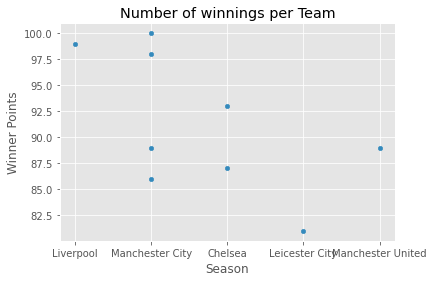

In [59]:
df_Winner.plot(x = 'Team', y = ['Points'] , kind = 'scatter')

plt.title('Number of winnings per Team')
plt.ylabel('Winner Points')
plt.xlabel('Season')
# plt.set_xticklabels(Season)
# fig.set_size_inches(18.5, 10.5)



plt.show()

The above chart shows that between 2011 and 2019, Manchester City has won the competition four times, Chelsea twice, and then Liverpoool, Leicester City and Manchester United have won once each.

**References:**

1.SkySports,Premier League (Sky Sports),Available at:https://www.skysports.com/premier-league-table(Accessed: 7 February 2021)

2.Breuss,M.'Beautiful Soup: Build a Web Scraper With Python – Real Python', Available at:https://realpython.com/beautiful-soup-web-scraper-python/(Accessed: 7 February 2021)

3.2021.[online] Available at: https://www.youtube.com/watch?v=15f4JhJ8SiQ&ab_channel=JohnWatsonRooney (Accessed: 7 February 2021)

3.GeeksforGeeks,'Adding new column to existing DataFrame in Pandas - GeeksforGeeks', Available at: https://www.geeksforgeeks.org/adding-new-column-to-existing-dataframe-in-pandas (Accessed: 8 February 2021)

4.Datatofish.com,'How to Select Rows from Pandas DataFrame', Available at:https://datatofish.com/select-rows-pandas-dataframe/ (Accessed: 12 February 2021)

5.Re-thought,'How to visualize data with Matplotlib from Pandas Dataframes', Available at:https://re-thought.com/how-to-visualise-data-with-python(Accessed: 12 February 2021)

